In [1]:
#Train your first classification tree

import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('datasets/wisconsin_breast_cancer.csv')
df_cancer = df[['radius_mean', 'concave points_mean', 'diagnosis']]
df_cancer['diagnosis'] = df_cancer['diagnosis'].replace('M', 1)
df_cancer['diagnosis'] = df_cancer['diagnosis'].replace('B', 0)
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

#In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll
#predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its
#mean number of concave points (concave points_mean).

#The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are
#assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to
#a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable
#called SEED which is set to 1.

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


D:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [2]:
#NOTE: You've just trained your first classification tree! You can see the first five predictions made by the fitted tree
#on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

In [3]:
#Evaluate the classification tree

#Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so
#using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

#The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test
#and the array of labels y_test.

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


In [4]:
#NOTE: Using only two features, your tree was able to achieve an accuracy of 89%!

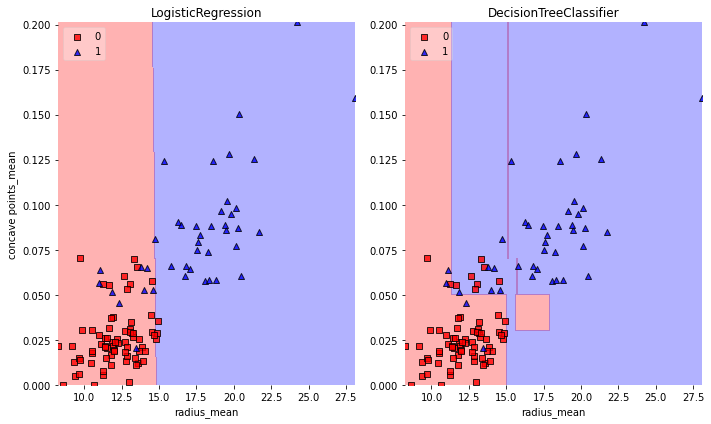

In [5]:
#Logistic regression vs classification tree

import sys
sys.path.append('datasets/')
import functions as fcs

#A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic
#regression produces only a single linear decision boundary dividing the feature space into two decision regions.

#We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of
#a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn
#more about this function.

#X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function
#plot_labeled_decision_regions() are available in your workspace.

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
fcs.plot_labeled_decision_regions(X_test, y_test, clfs)

In [6]:
#NOTE: Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the
#classification tree divide the feature space into rectangular regions.

In [7]:
#Growing a classification tree

#In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the
#following is not one of these rules?

#Possible Answers

#The existence of a node depends on the state of its predecessors.

#The impurity of a node can be determined using different criteria such as entropy and the gini-index.

#When the information gain resulting from splitting a node is null, the node is declared as a leaf.

#When an internal node is split, the split is performed in such a way so that information gain is minimized.*

In [8]:
#NOTE: It's quite the contrary! Actually, splitting an internal node always involves maximizing information gain!

In [9]:
#Using entropy as a criterion

#In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an
#information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

#X_train as well as the array of labels y_train are available in your workspace.

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [10]:
#NOTE: In the next exercise, you'll compare the accuracy of dt_entropy to the accuracy of a another tree trained using the
#gini-index as the information criterion.

In [11]:
#Entropy vs Gini index

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

#In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The
#tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set
#to the gini index using the keyword 'gini'.

#X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are
#available in your workspace.

# Import accuracy_score from sklearn.metrics
#from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using the gini index:  0.9210526315789473


In [12]:
#NOTE: Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to
#the same results. The gini index is slightly faster to compute and is the default criterion used in the
#DecisionTreeClassifier model of scikit-learn.

In [13]:
#Train your first regression tree

import pandas as pd
from sklearn.model_selection import train_test_split
df_mpg = pd.read_csv('datasets/auto-mpg.csv')
df_mpg = pd.get_dummies(df_mpg)
X = df_mpg.drop('mpg', axis=1)
y = df_mpg['mpg']
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

#In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg
#dataset using all the six available features.

#The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train
#are available in your workspace.

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [14]:
#NOTE: In the next exercise, you'll evaluate dt's performance on the test set.

In [15]:
#Evaluate the regression tree

#In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The
#RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model
#can be obtained by computing the square root of the model's Mean Squared Error (MSE).

#The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous
#exercise are available in your workspace.

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


In [16]:
#NOTE: In the next exercise, you'll compare the test-set RMSE of dt to that of a linear regression model trained on the
#same dataset.

In [17]:
#Linear regression vs regression tree

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already
#instantiated a linear regression model lr and trained it on the same dataset as dt.

#The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error
#function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** (1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.98
Regression Tree test set RMSE: 4.27
